In [ ]:
pip install jupyterthemes

In [ ]:
from jupyterthemes import jtplot

jtplot.style()
jtplot.style(theme='onedork')

---

  Abdiel Guerrero V. 💜



# Prediciendo el rating de libros utilizando regresión lineal

---

Este siguiente dataset contiene un registro del rating o puntuación recibida para alrededor de 12 mil títulos, recopilado por la comunidad virtual de catalogación de libros ‘Goodreads’. Se incluyen variables como autor del libro, puntuación promedio, lenguaje en el cual está escrito, número de páginas y cantidad total de ‘reviews’ de sus lectores.

**Técnicas que permitirá demostrar:** 
* Exploración de datos 
* Limpieza de datos 
* Visualización
* Preprocesamiento 
* Machine Learning (regresión lineal para la predicción del rating). 

**Librerías y/o paquetes:**
 Pandas, Numpy, Matplotlib, Seaborn, Sklearn. 


*Datos obtenidos por medio de la API de Goodreads.* ❗

---

El objetivo de este análisis es predecir el raing de los libros y entender cuáles son los factores importantes que hacen que un libro sea más popular que el resto.


---

# Importando librerías y configuración 📌

In [247]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [248]:
import warnings
warnings.filterwarnings("ignore")

In [249]:
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')

In [250]:
# Mi paleta de colores pastel
pastel_col = ['#fdcae1', '#84b6f4', '#fdfd96', '#77dd77', '#ff6961']

---

# Exploración de datos 🔬🕵🏻‍♂️

Primero vamos a comenzar con la exploración de datos, es una parte muy importante de todo el análisis debido a que aquí es donde verificamos de que datos disponemos, si están completos, que información valiosa podemos obtener, etc.

## Set de Datos

Vamos a comenzar trayendo nuestros datos:

In [251]:
# Comando para utilizar en Kaggle
# data = pd.read_csv('/kaggle/input/goodreadsbooks/books.csv', error_bad_lines = False)

In [252]:
# Trayendo desde mi Drive 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/books.csv', error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


El set de datos se puede descargar desde la plataforma Kaggle con la ruta que está en la primera instrucción.

---

### Documentación 📝 : `error_bad_linesbool`

```py
error_bad_linesbool, optional, default: None
```

Las líneas con demasiados campos (por ejemplo, una línea csv con demasiadas comas) provocarán de forma predeterminada que se genere una excepción y no se devolverá ningún DataFrame. Si es False, estas "líneas defectuosas" se eliminarán del DataFrame que se devuelva. 

En desuso desde la versión 1.3.0: el parámetro `on_bad_lines` debe usarse en su lugar para especificar el comportamiento al encontrar una línea incorrecta.

---

## Entendiendo la información 👩🏻‍💻👨🏻‍💻

Vamos a visualizar los primeros 10 elementos para entender la información que disponemos y cómo es que está estructurada:

In [253]:
data.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


Podemos observar que contamos con los siguientes datos:

* **ID**
* Título del libro
* Autor
* Calificación promedio (característica que queremos estudiar)
* **ISBN (identificador único para libros)**
* Idioma
* Número de páginas
* Número de calificaciones
* Conteo de reviews en formato de texto
* Fecha de publicación
* Editora


Desde un inicio podemos quedarnos únicamente con la información relevante, omitiendo los ID y los ISBN; que no son más que números identificadores sin ninguna corelación con el libro y su calificación.

---

Ahora vamos a obtener un poco de información, como por ejemplo, las llaves de cada columna, el tipo de dato y el conteo de datos nulos:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Además, podemos observar que el dataset cuenta con información numérica y categorica (Dtype).

---

La longitud de nuestro dataset:

In [ ]:
# Cantidad de datos
len(data)

11123

---

Y un resumen de la información numérica de la que disponemos, pero quitando del camino los identidicadores únicos que no nos proporcionan información importante:

In [ ]:
# Quitamos las columnsa numéricas que no aportan información relevante
important_columns = set(data.columns) - {'bookID', 'isbn', 'isbn13'}

# Buscamos las columnas anteriores en el set de datos
new_df = data[list(important_columns)]

# Describimos
new_df.describe()

,average_rating,ratings_count,text_reviews_count,num_pages
count,11123.000000,1.112300e+04,11123.000000,11123.000000
mean,3.934075,1.794285e+04,542.048099,336.405556
std,0.350485,1.124992e+05,2576.619589,241.152626
min,0.000000,0.000000e+00,0.000000,0.000000
25%,3.770000,1.040000e+02,9.000000,192.000000
50%,3.960000,7.450000e+02,47.000000,299.000000
75%,4.140000,5.000500e+03,238.000000,416.000000
max,5.000000,4.597666e+06,94265.000000,6576.000000


Con esto podemos darnos una idea aproximada de los datos de los que disponemos.

Podemos observar que en promeidio, los libros tienen cerca de 540 reseñas escritos, 330 páginas, un rating promedio de 3.9 (casi 4) y al rededor de 17,900 calificaciones.

El libro con mayor número de reviews en texto tiene aproximadamente 90,000 reviews, y el libro con mayor número de paginas rebasa las 6500 páginas.

---

## Limpieza de datos 🛠🔓

Esta parte es muy impórtante, especialmente para el momento dónde empleamos un modelo de Machine Learning; ya que si llegamos a contar con datos incompletos, datos nulos, información aberrante, etc. Puede modificar el resultado de nuestro análisis y posteriormente, afectar el aprendizaje del modelo .

---

Vamos a comenzar por verificar si contamos con datos duplicados

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11118    False
11119    False
11120    False
11121    False
11122    False
Length: 11123, dtype: bool

---

Otra forma  de verificarlo sería

In [ ]:
data.index.duplicated().any()

False

---

En caso de que hubiera datos que si se repitieran los podríamos remover por medio de la siguiente instrucción:

In [ ]:
data.drop_duplicates()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


----

Ahora vamos a verificar que no tengamos datos vacíos, los cuáles podemos visualizar por medio de un mapa de calor.

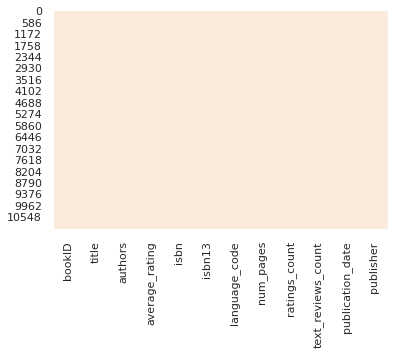

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap=sns.color_palette("rocket_r", as_cmap=True))

La información está dividida por columnas o llaves, además de que la paleta de colores nos da a entender que de estar en color blanco no tenemos valores nulos, mientras que en caso de aparecer rayas de color negro, tendríamos valores nulos presentes.

Ya hemos verificado que no hay datos repetidos, ni datos incompletos, por lo que lo que el dataset ya está limpio y listo para que avancemos.

---

# Visualización de Datos 📊📉

Por suerte el set de datos con el que comenzamos ya estaba bastante limpio y no tuvimos que hacer mucho para dejarlo en buenas condiciones.

Ahora que ya está listo, es momento de explorar visualmente los datos para entender la información y comenzar a fórmular preguntas.

---

## TOP de libros mejor puntuados

Podríamos comenzar esta exploración tratando de visualizar cuáles son los 5 libros con mejor calificación, quizá por ahí podríamos comenzar generar nuevos insights acerca de qué es lo que hace a un libro más popular o bien recibido por el público:

In [ ]:
top5_rating_df = pd.DataFrame( data.average_rating.nlargest(5) )
print(top5_rating_df.value_counts())

average_rating
5.0               5
dtype: int64


Podemos observar que los primeros 5 libros que revisamos, ya cuentan con una calificación perfecta. Por lo que deberíamos de expandir nuestra visualización a más libros:

In [ ]:
top_rating_df = pd.DataFrame( data.average_rating.nlargest(25) )

In [ ]:
print(top_rating_df.value_counts())

average_rating
5.00              22
4.86               1
4.88               1
4.91               1
dtype: int64


Podemos observar que contamos con 22 libros con calificación perfecta de 5 estrellas, seguidos de 3 libros con calificaciones muy cercanas. 

**Por lo que al ir por esta vía tendríamos que hacer mínimo un TOP 25,** dejando de lado la idea del TOP 5.

---

### Visualización  📊: TOP 25 de libros en base a su calificación o rating


Vamos a visualizar estos 25 libros mejor calificados y a obtener algo de información acerca de ellos:

In [ ]:
top_rating_plot = data.nlargest(25, ['average_rating']).set_index('title')['average_rating']

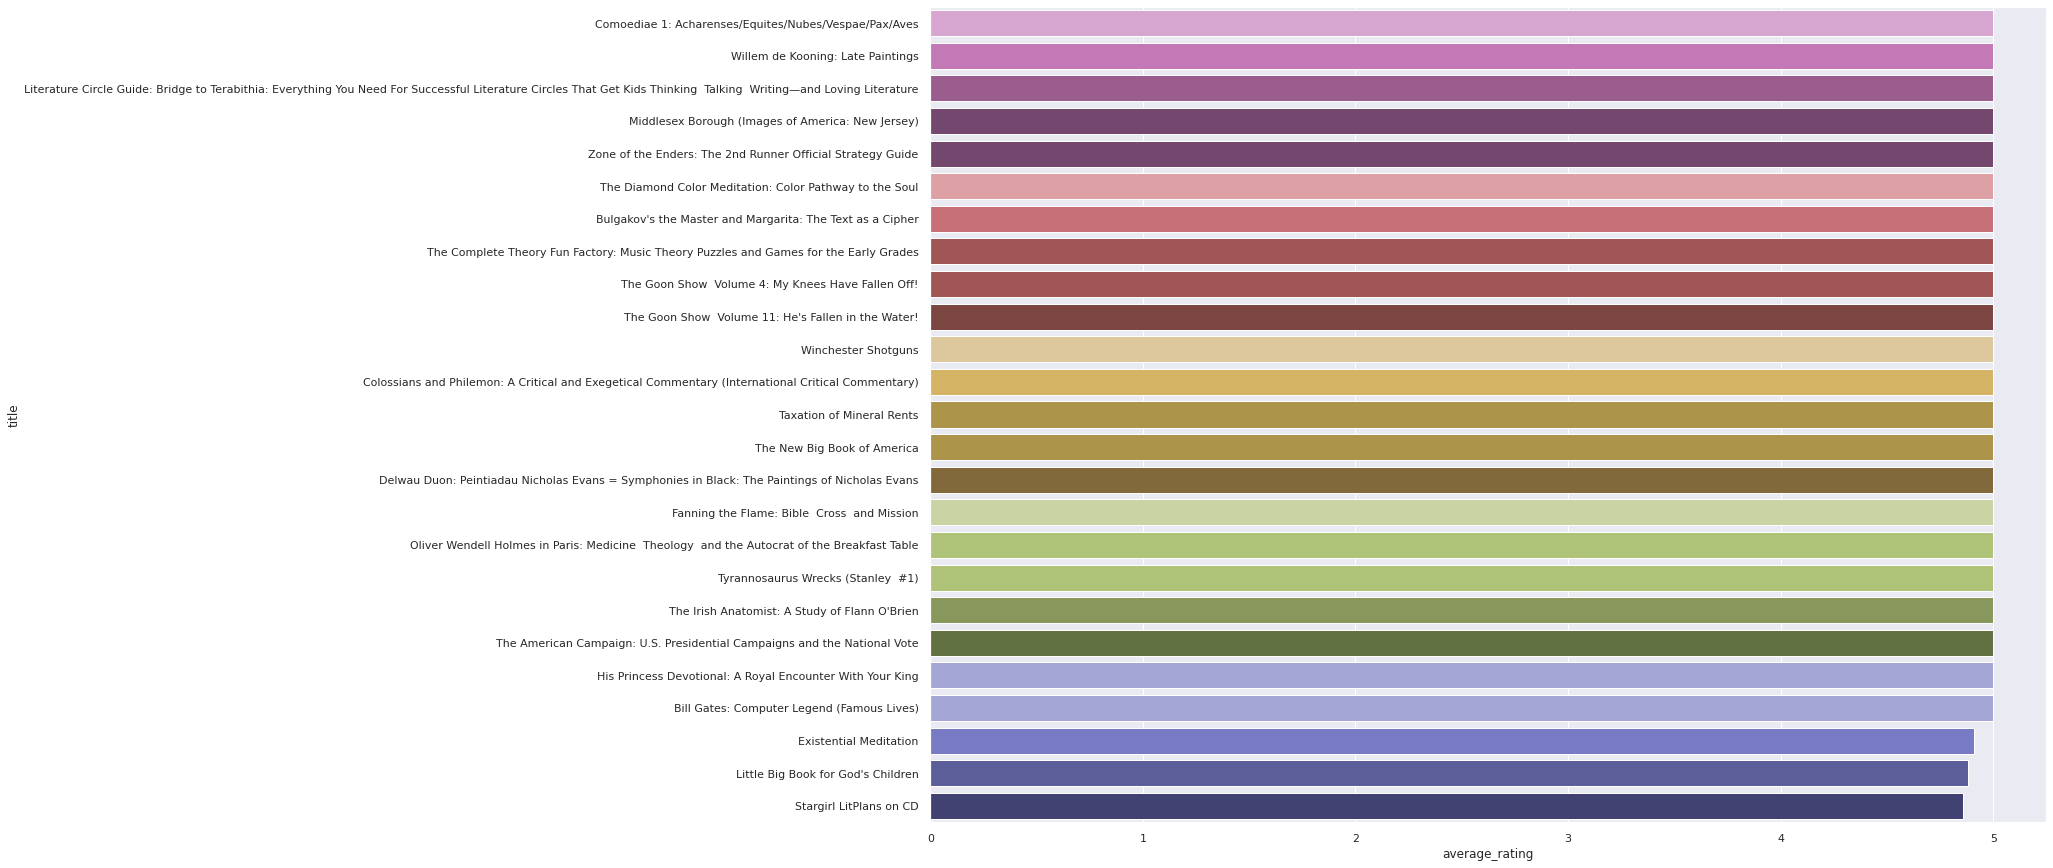

In [ ]:
sns.set(rc = {'figure.figsize':(20,15)})

sns.barplot(top_rating_plot, top_rating_plot.index, palette='tab20b_r')

Y sus respectivos titulos son los siguiente:

In [ ]:
print(top_rating_plot.index)

Index(['Comoediae 1: Acharenses/Equites/Nubes/Vespae/Pax/Aves',
       'Willem de Kooning: Late Paintings',
       'Literature Circle Guide: Bridge to Terabithia: Everything You Need For Successful Literature Circles That Get Kids Thinking  Talking  Writing—and Loving Literature',
       'Middlesex Borough (Images of America: New Jersey)',
       'Zone of the Enders: The 2nd Runner Official Strategy Guide',
       'The Diamond Color Meditation: Color Pathway to the Soul',
       'Bulgakov's the Master and Margarita: The Text as a Cipher',
       'The Complete Theory Fun Factory: Music Theory Puzzles and Games for the Early Grades',
       'The Goon Show  Volume 4: My Knees Have Fallen Off!',
       'The Goon Show  Volume 11: He's Fallen in the Water!',
       'Winchester Shotguns',
       'Colossians and Philemon: A Critical and Exegetical Commentary (International Critical Commentary)',
       'Taxation of Mineral Rents', 'The New Big Book of America',
       'Delwau Duon: Peintiadau 

---

Ahora vamos a averiguar cuántos ratings o calificaciones tiene cada uno de estos libros que tienen una excelente calificación:

In [ ]:
# Guardamos los titulos en una variable
top_rating_titles = top_rating_plot.index

In [ ]:
# Lista para guardar el conteo de ratings totales
total_counts = []

# Iteramos cada uno de los titulos con mejor rating
for i in top_rating_titles:

  # Buscamos los titulos en los datos
  if i in data.title.values:

    # Si coincide con el titulo, entonces trae el conteo de ratings
    rating_count_perbook = (data[data['title']==i]['ratings_count'])
    # Únicamente nos interesa el valor entero
    rating_count_perbook = int(rating_count_perbook)
    
    total_counts.append(rating_count_perbook)

print(total_counts)

[0, 1, 4, 2, 2, 5, 4, 1, 3, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 11, 8, 5]


Viendo estos datos podemos concluir algo interesante. En primer lugar, hay un par de libros que tienen una calificación perfecta de 5, pero tienen un conteo de 0 al buscar en la colunna `'ratings_count'`, por lo que no parece muy coherente que tengan un 5.

In [ ]:
# Suma el total de ratings
np.sum(total_counts)

62

Además, la mayoría del resto de libros no pasa  de las 5 calificaciones realizadas; a excepción de una que llegó a 8 y otra a 11, cosa que sigue siendo muy poco considerable.

Por lo que podemos decir que estas calificaciones se mantienen muy altas gracias a que muy pocas personas (o ninguna) ha realizado calificaciones a cerca de estos libros. Así que, definitivamente este no es un buen rastreador de popularidad o de que sea "un buen libro". 

Por lo tanto, tendremos que cambiar de estrategía.

---

## Organizando los libros en base a su Idioma

Debido a que no obtuvmos mucha información relevante a partir de las calificaciones más altas, podemos tratar de buscar una alternativa diferente; en esta ocasión vamos a explorar y visualizar los datos acorde a su idioma (lengua original en la que fue escrita) para ver si hay alguna corelación interesante.

---

### Visualización  📊: Graficando los lenguajes natales de cada libro 

Ha continuación vamos a visualizar los lenguajes en los que han sido escritos los libros de nuestro dataset. 

Comenzaremos por una visualización general para ver cuál es la tendencia.

In [ ]:
all_lang_codes = data.language_code.value_counts()

Text(0.5, 1.0, 'Lenguajes')

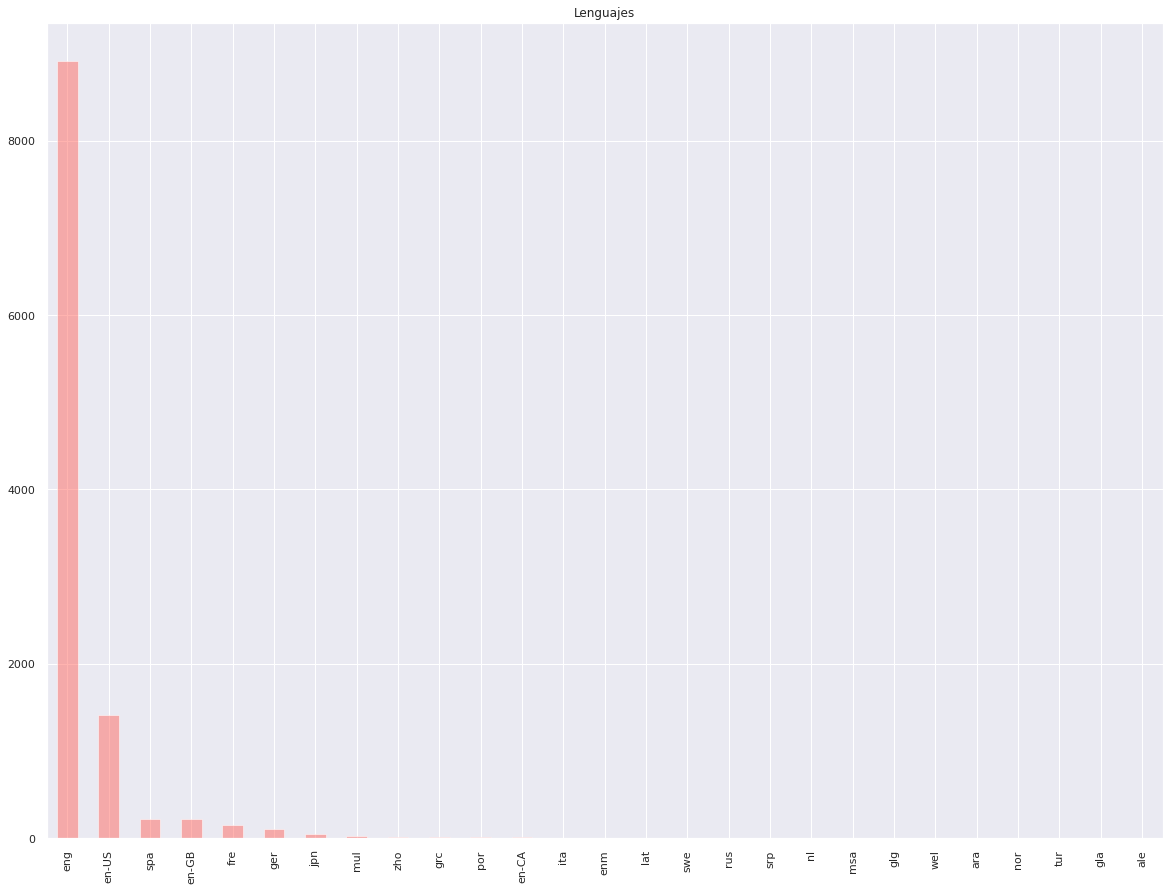

In [ ]:
all_lang_codes.plot(kind='bar', color=pastel_col[4], alpha=.5)
plt.title('Lenguajes')

Podemos percatarnos de que los lenguajes se aglomeran en sólo unos cuántos, principalmente en el inglés; por lo que a primera vista vemos que está bastante disparejo.

Para realizar un análisis más profundo vamos a graficar el TOP 5 de ellos.

---

### Visualización 📊: Top 5 de lenguajes

Vamos a explorar cuáles son los 5 lenguajes que predominan nuestro dataset

In [ ]:
# Variable para hacer más cortas las instrucicones de graficado
topLenguages = data.language_code.value_counts().head(5)

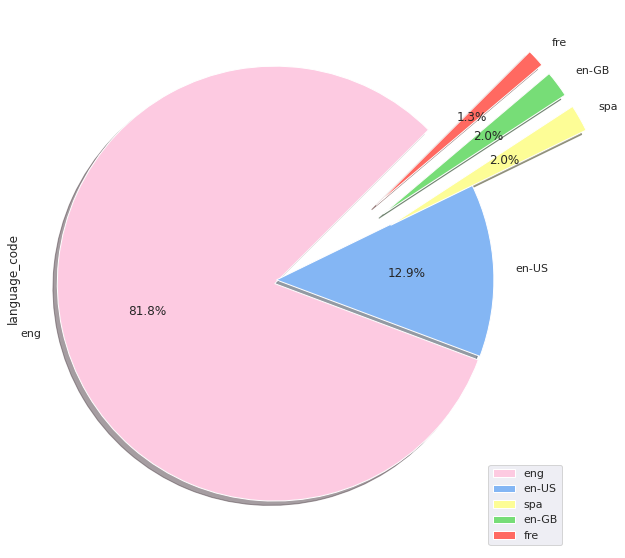

In [ ]:
# Distancia con respecto a la primer parte
explode = (0.1, -.09, .5, .5, .5)
# Tamaño de la gracia
figsize=(10,10)
# Reescalado
autopct='%1.1f%%'

topLenguages.plot(kind='pie', figsize=figsize, autopct=autopct,
                  explode=explode, colors=pastel_col, shadow=True,
                  startangle=45).legend()

Podemos observar que la gran mayoría de las obras de las que se han recopilado los datos, son obras que originalmente fueron escritas en inglés británico, seguido por el inglés estadounidense y el español.

**Por lo que podemos decir que, más del 90% de los libros de este dataset** (y los más populares en el mundo) están en inglés, por lo que puede ser considerada como una variable casi constante.

---

## Entendiendo la distribución de los ratings

Ya hemos tratado de entender cáles son los libros con mejor puntuación, pero eso nos aleja de nuestra pregunta principal. 

**¿Cuáles son los factores que hacen que un libros sea más popular que el resto?**

Por lo cuál, tendríamos que enfocarnos más en la cantidad de personas que realizan las reseñas, de manera que nos demos una idea del alcance que tiene el libro. Para ello, vamos a visualizar la distribución de las calificaciones de los libros más populares, o en este caso, con mayor cantidad de reseñas.

### Visualización  📊: Distribución de las calificaciones de los libros

En lugar de buscar "la mejor calificación", vamos a buscar **"la mayor cantidad de calificaciones"** y nos guiaremos por medio de la distrubución de las mismas:

In [ ]:
# Lo agregamos a una variable para hacer más cortas las instrucciones
average_rating = data.average_rating

Text(0, 0.5, 'Frecuencia')

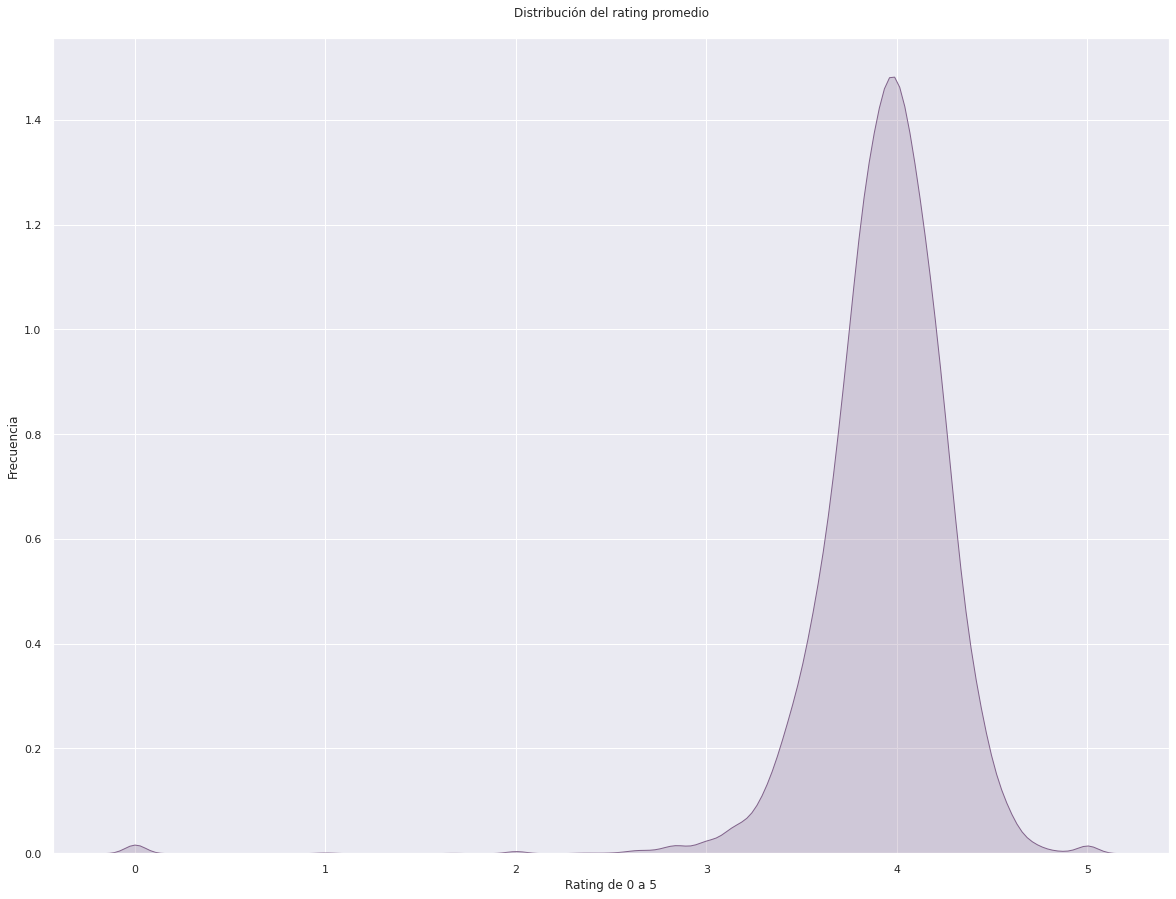

In [ ]:
# Grciamos una KDE 
# KDE (Kernel Density Estimate)
sns.kdeplot(average_rating, shade=True, label='Rating Promedio', 
            color='#81638b', common_norm=True)

plt.title('Distribución del rating promedio\n')
plt.xlabel('Rating de 0 a 5')
plt.ylabel('Frecuencia')

Versión normalizada:

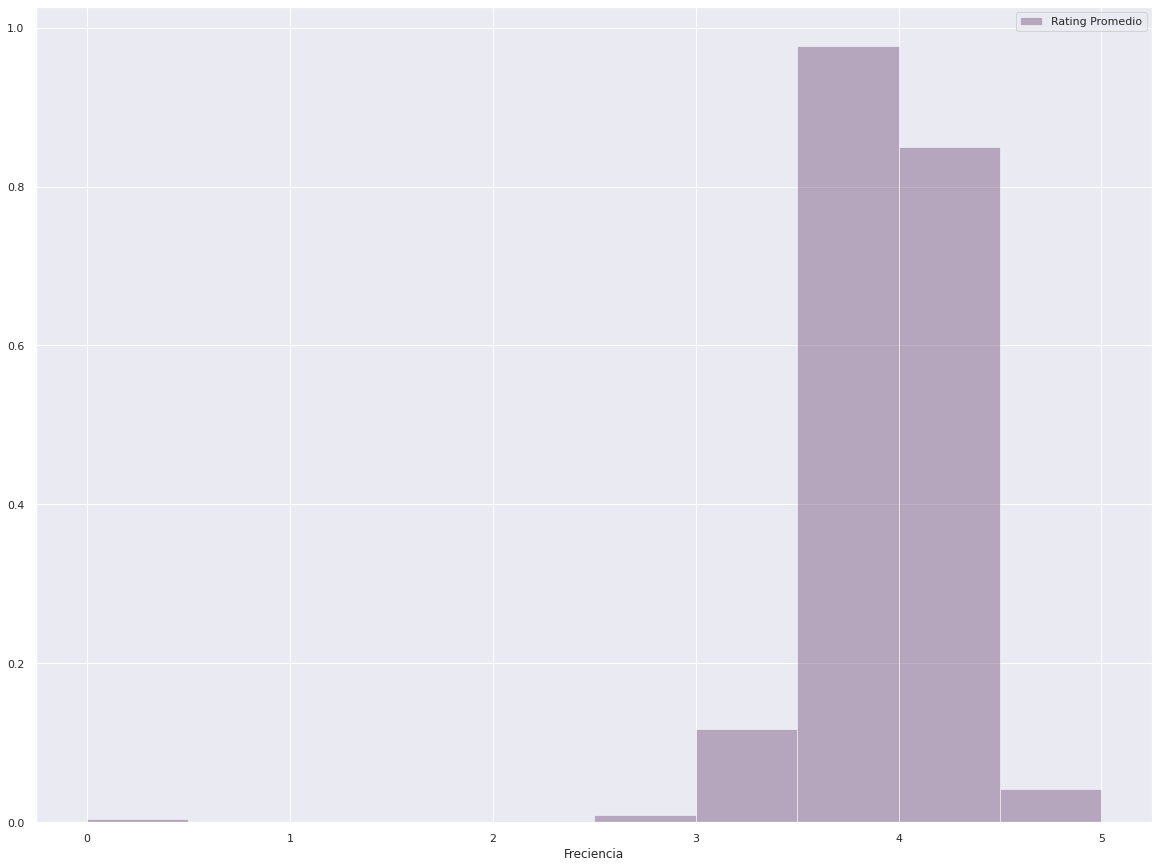

In [ ]:
plt.hist(average_rating, 
         density=1, 
         color="#81638b", 
         label="Rating Promedio", 
         alpha=0.5)

plt.xlabel('Calificación')
plt.xlabel('Freciencia')
plt.legend()
plt.show()

Podemos observar que si bien, hay libros con una calificación perfecta; la mayor parte de la audiencia consume y ha popularizado (o al menos los califican más veces) los libros que están en el intervalo entre 3.5 y 4.5, con un pico en aquellos libros con 4 de calificación.

Por lo que podemos observar que no precisamente los libros mejores calificados son los más populares o más aceptados por los lectores. Sino aquellos que han sido calificados una mayor cantidad de veces.

---

## Visualización  📊: Número de libros en base a su rating

Vamos a comenzar por visualizar el intervalo dónde contamos con la mayor cantidad de libros, en este caso abarcaremos el rango $[3.77, 4.17]$

In [ ]:
average_rating_mid = average_rating.value_counts().head(30)

Text(0, 0.5, 'Conteo de libros')

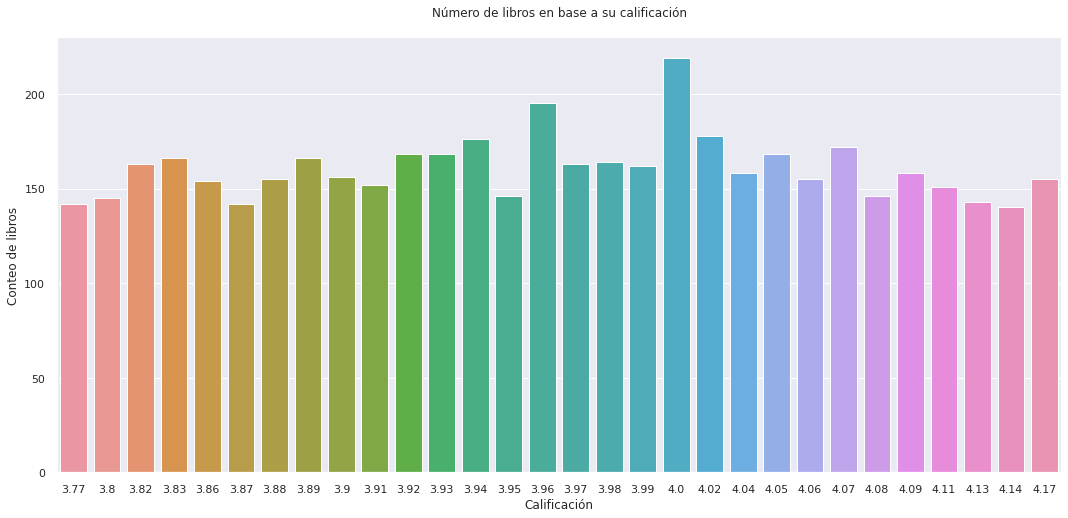

In [ ]:
sns.set(rc = {'figure.figsize':(18,8)})

sns.barplot(average_rating_mid.index, average_rating_mid)
plt.title('Número de libros en base a su calificación\n')
plt.xlabel('Calificación')
plt.ylabel('Conteo de libros')

Podemo ver que la calificación que más veces aparece es la de 4.0, aunque desde 3.82 a 4.07 mantienen una considerable cantidad de calificaciones realizadas por los lectores.

In [ ]:
print(sum(average_rating_mid))

4826


Tan solo en este pequeño intervalo tenemos $4826$ calificaciones realizadas, un gran contraste respecto a las $62$ que teníamos en los libros con las mejores calificaciones.

Con esto confirmamos que los libros más populares son aquellos que mantienen un mayor conteo de calificaciones, por lo que esta será la pauta que guíe la siguiente parte del análisis.

---

## Calificaciones y Reviews

Sabiendo que la calificación del libro no necesariamente habla de su popularidad y viendo que, hay una enorme cantidad de libros que han sido calificados entre 3.5 y 4.5, podemos seguir este razonamiento para visualizar aquellos libros que tienen un mayor conteo de calificaciones; quizá ya no hablando de la "calidad del libro" según la crítica, sino a partir de la popularidad atribuida a la cantidad de personas que lo ha leído y le ha dejado una calificación.

### Visualización  📊: 10 libros con mayor conteo de calificaciones

Es hora de visualizar cuáles son aquellos libros que juntan la mayor cantidad de calificaciones y reseñas.

Comenzaremos por las calificaciones (aquellas puntuaciones de 0 a 5).

In [ ]:
# Obten a los 10 valores más altos 
# y agregarles el titulo para diferenciarlos en el eje y
popular_rated_book = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']

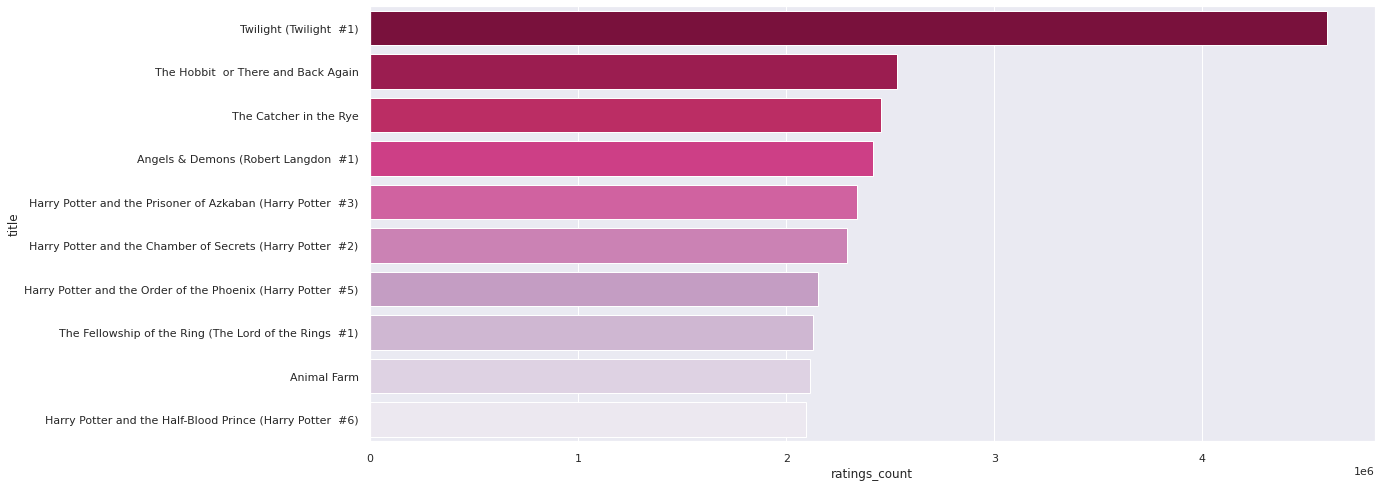

In [ ]:
sns.barplot(popular_rated_book, popular_rated_book.index, palette='PuRd_r')

Los títulos de esos libros son los siguientes:

In [ ]:
print(popular_rated_book.index)

Index(['Twilight (Twilight  #1)', 'The Hobbit  or There and Back Again',
       'The Catcher in the Rye', 'Angels & Demons (Robert Langdon  #1)',
       'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
       'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
       'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
       'The Fellowship of the Ring (The Lord of the Rings  #1)', 'Animal Farm',
       'Harry Potter and the Half-Blood Prince (Harry Potter  #6)'],
      dtype='object', name='title')


In [ ]:
print(popular_rated_book[0])

4597666


A partir de esta visualización hemos encontrado una caractéristica importante, ya que el conteo de calificaciones o de rating nos habla de la popularidad de los libros; teniendo a "Twilight" en primer lugar, con un conteo de de $4,597,666$ calificaciones 😮.

---

### Visualización  📊: 10 libros con mayor cantidad de reseñas escritas

In [ ]:
most_write_revw = data.nlargest(10, ['text_reviews_count'])

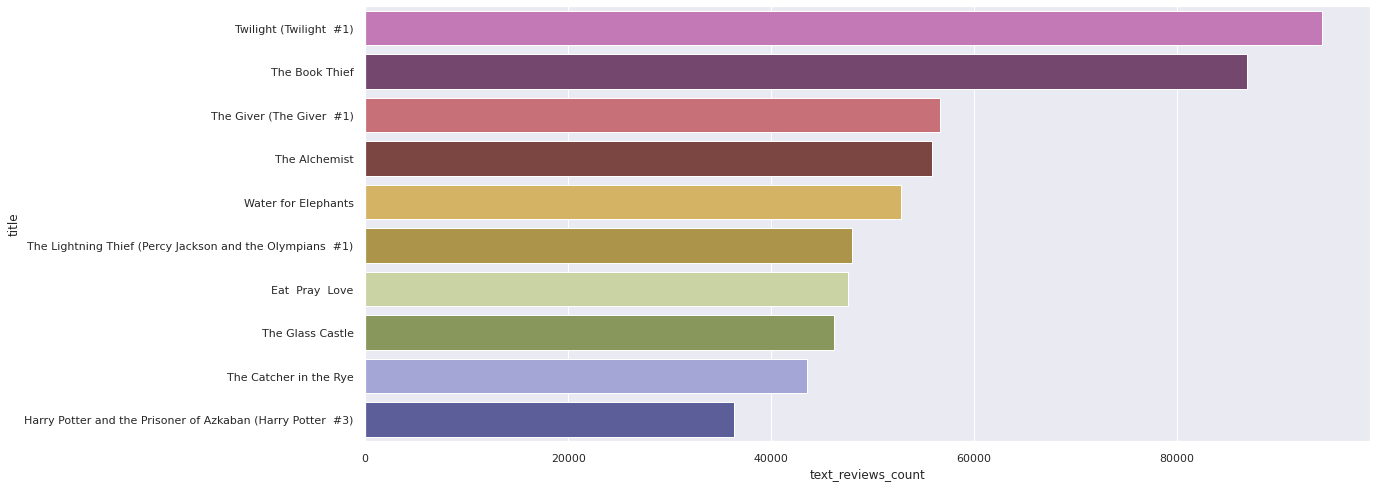

In [ ]:
sns.barplot(most_write_revw['text_reviews_count'], 
            most_write_revw['title'],
            palette = 'tab20b_r')

Y los títulos son los siguientes:

In [ ]:
print(most_write_revw['title'])

10336                              Twilight (Twilight  #1)
5270                                        The Book Thief
1069                             The Giver (The Giver  #1)
284                                          The Alchemist
10700                                  Water for Elephants
7309     The Lightning Thief (Percy Jackson and the Oly...
5407                                       Eat  Pray  Love
2060                                      The Glass Castle
1462                                The Catcher in the Rye
3        Harry Potter and the Prisoner of Azkaban (Harr...
Name: title, dtype: object


In [ ]:
print(most_write_revw['text_reviews_count'].head(1))

10336    94265
Name: text_reviews_count, dtype: int64



Donde el libro de la cima es Twilight y cuenta con $94265$ reseñas escritas. Así, que estas 2 variables, cantidad de calificaciones y cantidad de reseñas; son indicadores de libros populares.

---

## Popularidad vs Cantidad de páginas

Vamos a visualizar aquellos libros más cortos y aquellos que tienen más páginas. Con la finalidad de encontrar algo de información valiosa y posteriormente hacer una comparación respecto a su popularidad.

Vamos a buscar información respecto al número de páginas para establecer valores que tengan sentido

In [ ]:
data['  num_pages'].describe()

count    11123.000000
mean       336.405556
std        241.152626
min          0.000000
25%        192.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name:   num_pages, dtype: float64

Sabiendo que el %50 de los libros cuentan con 300 páginas y el $25 con 192, vamos a establecer a un "libro corto" como aquel que no rebasa de las 200 página.

---

### Visualización 📊: TOP 10 de libros con menos páginas (en base al rating)


Vamos a comenzar visualizando cuál es el top 10 (en base al conteo de calificaciones) de los libros con menos de 200 página:

In [ ]:
# Todos los libros con menos de 200 páginas
shorter_top_books = data[data['  num_pages'] <= 200]

# TOP 10 libros con menos de 200 páginas
top10_shorter_books = shorter_top_books.nlargest(10, ['ratings_count'])

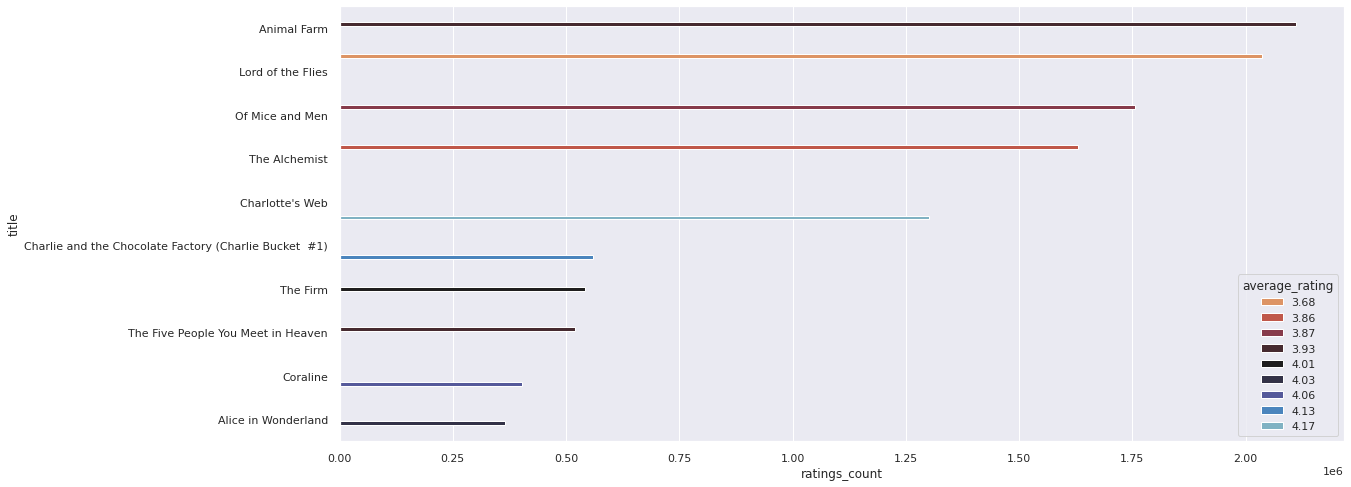

In [ ]:
sns.barplot(top10_shorter_books['ratings_count'],
            top10_shorter_books['title'],
            hue=top10_shorter_books['average_rating'],
            palette='icefire_r')

In [ ]:
titles_array = (np.array(top10_shorter_books['title']))

titles_dict = {
    'Title': titles_array
}

In [ ]:
rating_array = (np.array(top10_shorter_books['ratings_count']))

rating_dict = {
    'Rating Counts': rating_array
}

In [ ]:
average_rating_array = (np.array(top10_shorter_books['average_rating']))

average_rating_dict = {
    'Average rating': average_rating_array
}

In [ ]:
pages_array = np.array(top10_shorter_books['  num_pages'])

pages_dict = {
    'Number of pages' : pages_array
}

Y aquí se puede ver cada título con sus respectivas páginas:

In [ ]:
shorter_db = {**titles_dict,**average_rating_dict, **rating_dict,  **pages_dict}
shorter_df = pd.DataFrame(shorter_db)
shorter_df.sort_values('Average rating', ascending=False)

,Title,Average rating,Rating Counts,Number of pages
4,Charlotte's Web,4.17,1300470,184
5,Charlie and the Chocolate Factory (Charlie Buc...,4.13,558799,176
8,Coraline,4.06,403622,162
9,Alice in Wonderland,4.03,364782,92
6,The Firm,4.01,540910,76
0,Animal Farm,3.93,2111750,122
7,The Five People You Meet in Heaven,3.93,520051,196
2,Of Mice and Men,3.87,1755253,103
3,The Alchemist,3.86,1631221,197
1,Lord of the Flies,3.68,2036679,182


Todos ellos se mantienen por arriba de la calificación promedio de $3.6$. Por lo que está dentro del rango que establecimos donde se concentra la mayor parte de libros con muchas calificaciones.

---

Ahora hagamos lo mismo con los libros que tienen más páginas, en este caso nos vamos a apoyar del límite superior; por lo que no necesitamos agregar una condición como en el caso anterior. Basta con tomar los más grandes en base al número de páginas.

Existe una diferencia y es que, aquí tenemos acotado superiormente el número de páginas; pero nos interesaría saber también cuántas páginas tiene cada uno de los libros de TOP.

### Visualización 📊: Libros con más páginas

In [ ]:
# Libros ordenados en base al número de paginas
longest_books_ = data.nlargest(10, ['  num_pages'])
longest_books = data.nlargest(10, ['  num_pages']).set_index('title')

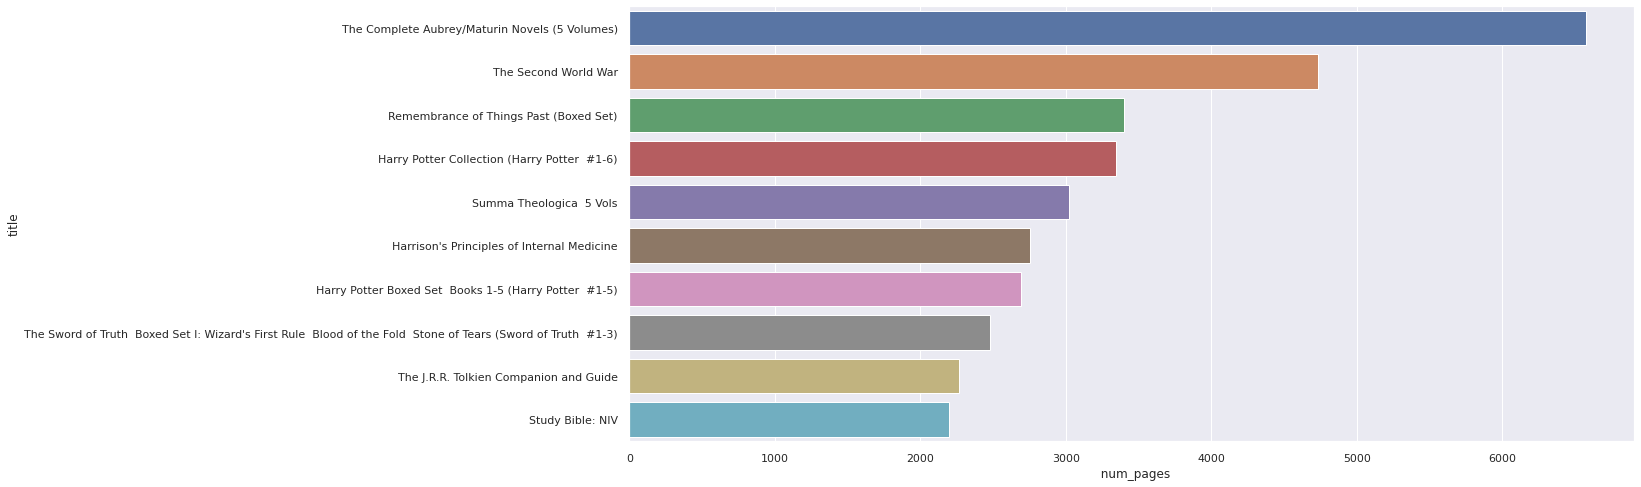

In [ ]:
sns.barplot(longest_books['  num_pages'], longest_books.index)

Los títulos más largo son los siguientes:

In [ ]:
print(longest_books.index)

Index(['The Complete Aubrey/Maturin Novels (5 Volumes)',
       'The Second World War', 'Remembrance of Things Past (Boxed Set)',
       'Harry Potter Collection (Harry Potter  #1-6)',
       'Summa Theologica  5 Vols',
       'Harrison's Principles of Internal Medicine',
       'Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)',
       'The Sword of Truth  Boxed Set I: Wizard's First Rule  Blood of the Fold  Stone of Tears (Sword of Truth  #1-3)',
       'The J.R.R. Tolkien Companion and Guide', 'Study Bible: NIV'],
      dtype='object', name='title')


---

### Visualización 📊: TOP de rating de libros más largos

Y de estos libros más largos, tienen el siguiente conteo de raing.

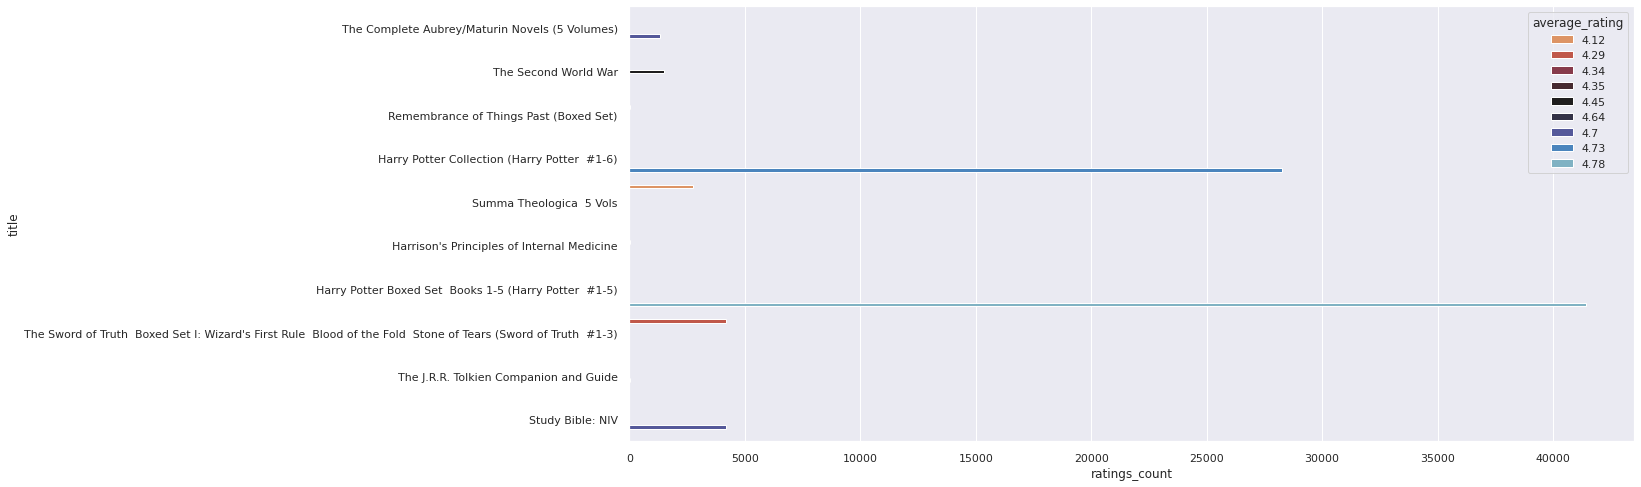

In [ ]:
sns.barplot(longest_books_['ratings_count'],
            longest_books_['title'],
            hue=longest_books_['average_rating'],
            palette='icefire_r')

Podemos ver que todos rebasan de una calificación promedio de $4.12$, pero al ver los conteos nos percatamos de que sólo 2 libros de estos 10 pasan de los $5000$ conteos.

---

### Visualización 📊: Libros más largos vs su rating

Text(0.5, 1.0, 'Conteo de rating')

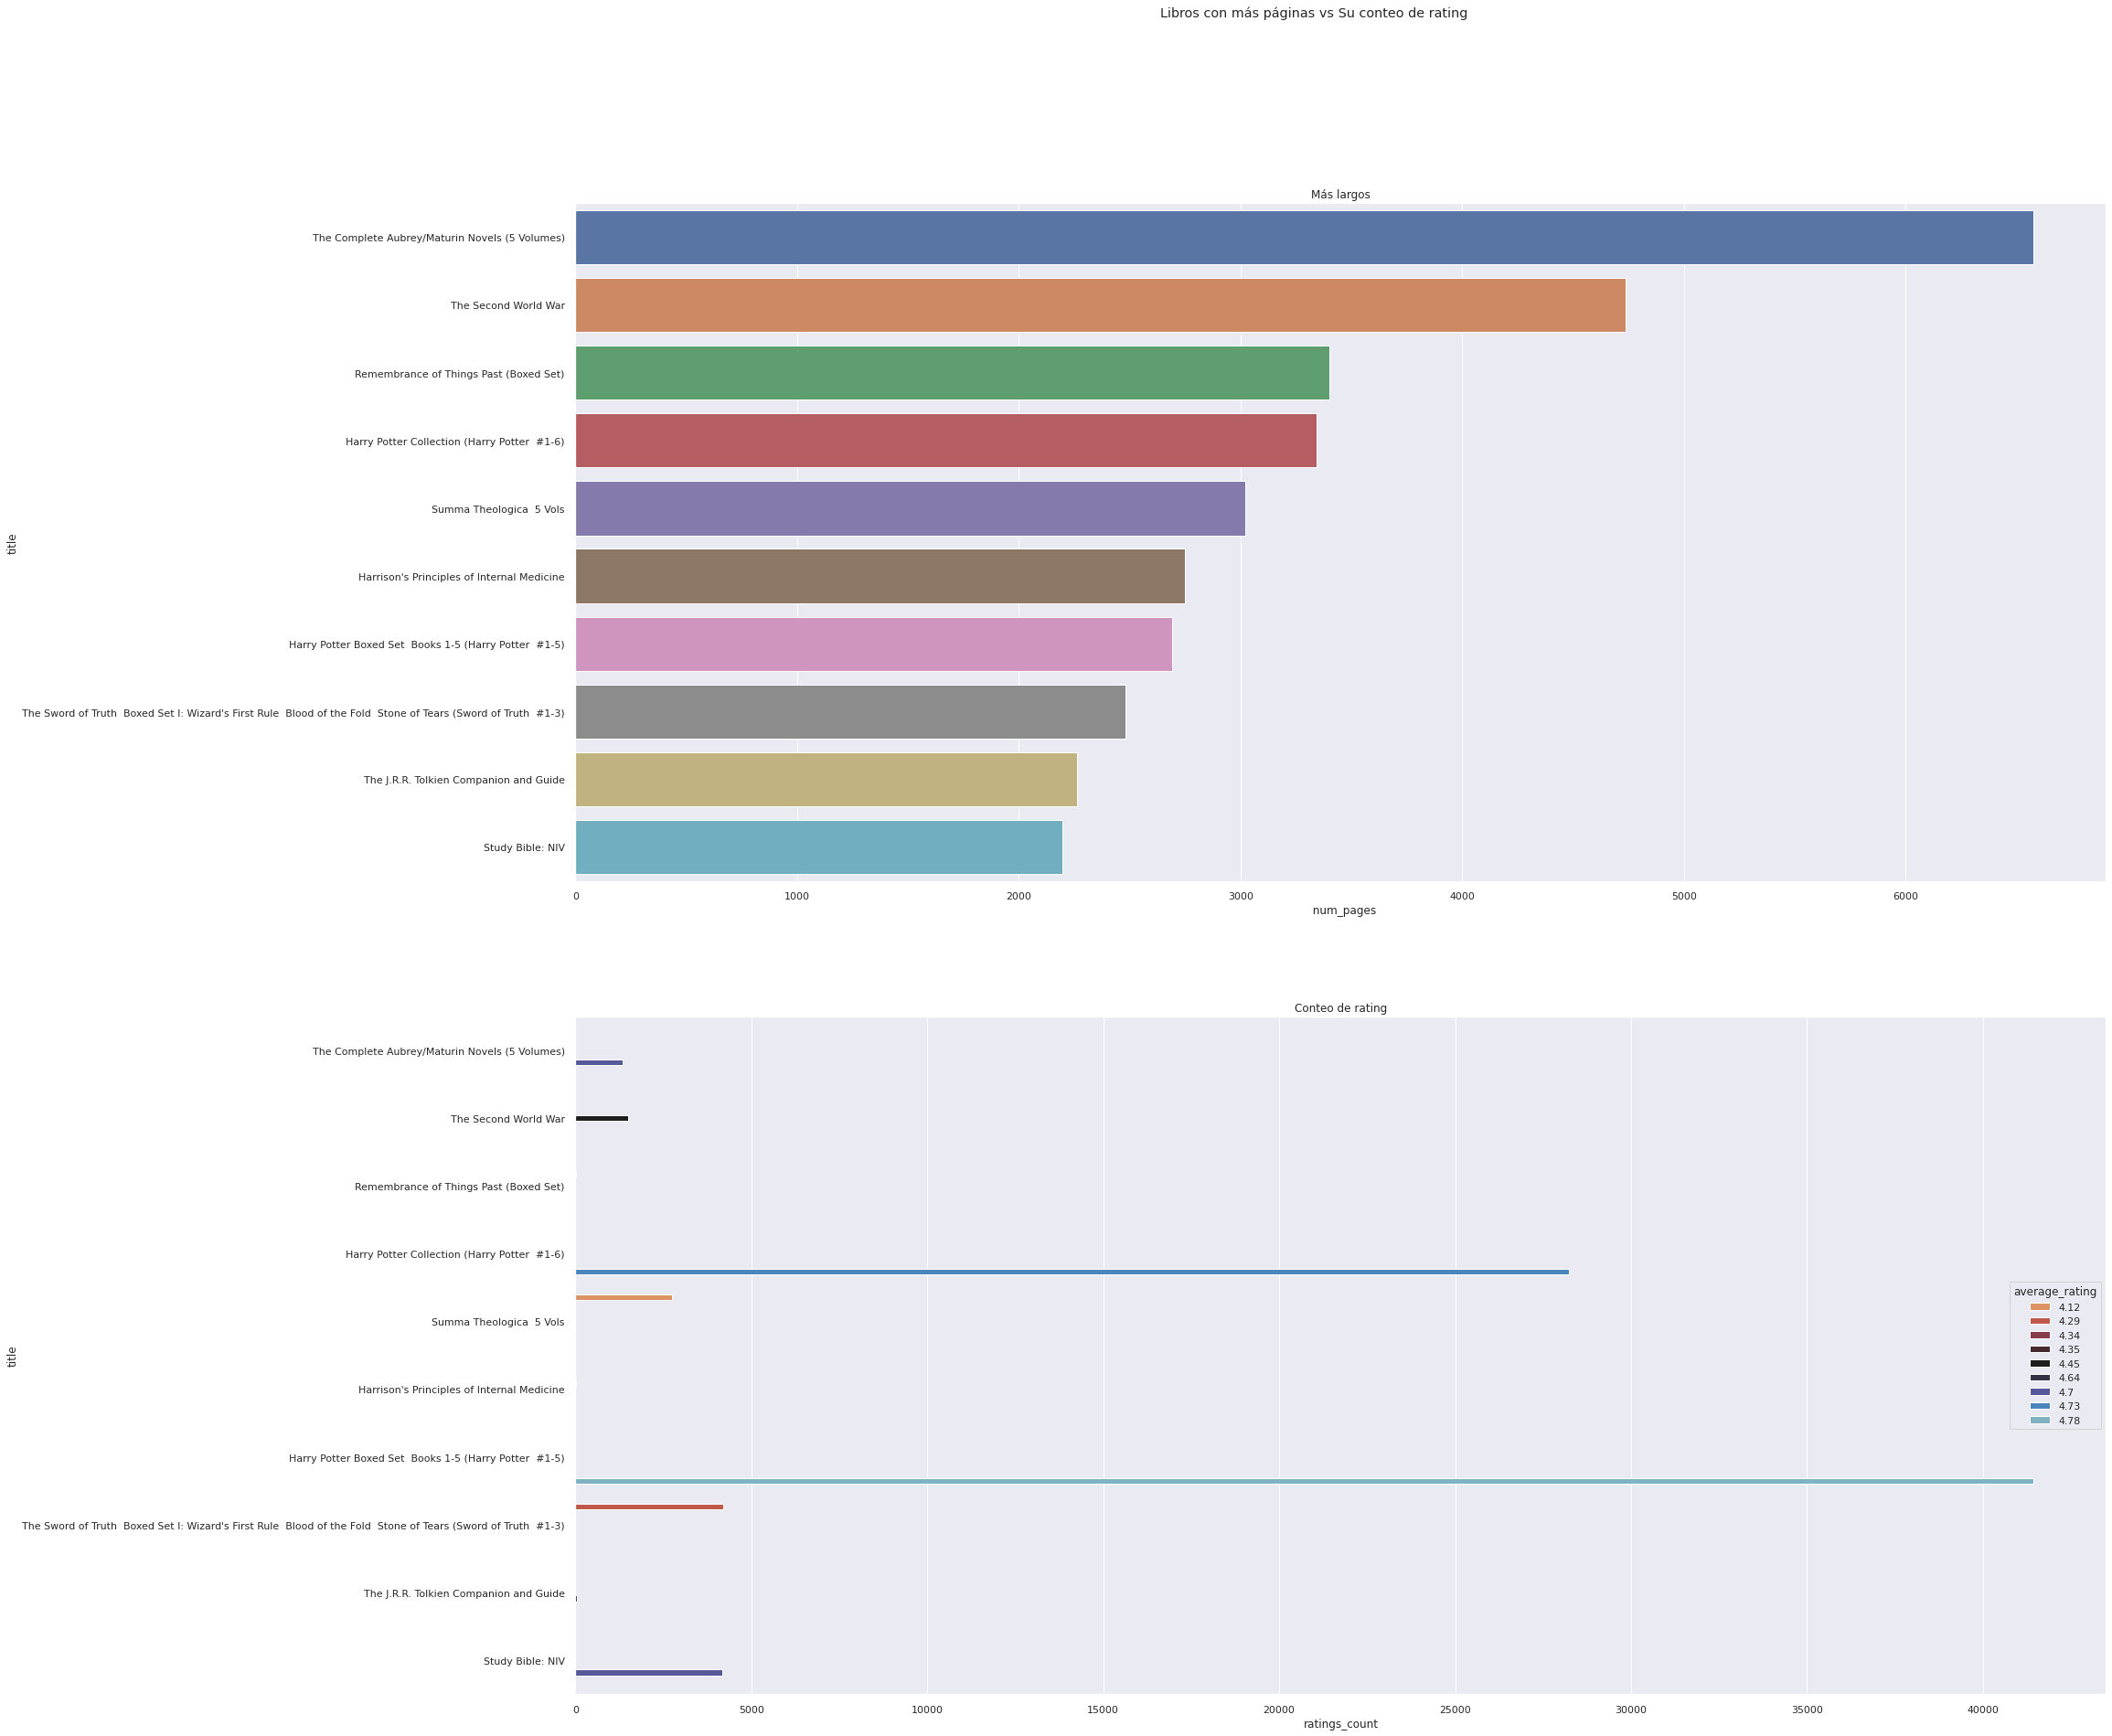

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(30, 30))
fig.suptitle('Libros con más páginas vs Su conteo de rating ')
######################################################################################
sns.barplot(longest_books['  num_pages'], longest_books.index, ax=axes[0])
axes[0].set_title("Más largos")
######################################################################################
sns.barplot(longest_books_['ratings_count'], longest_books_['title'],
            hue=longest_books_['average_rating'], palette='icefire_r', ax=axes[1])
axes[1].set_title("Conteo de rating")

In [ ]:
titles_array_2 = (np.array(longest_books_['title']))
rating_array_2 = (np.array(longest_books_['ratings_count']))
average_rating_array_2 = (np.array(longest_books_['average_rating']))
pages_array_2 = np.array(longest_books_['  num_pages'])


titles_dict_2 = {
    'Title': titles_array_2
}

rating_dict_2 = {
    'Rating Counts': rating_array_2
}

average_rating_dict_2 = {
    'Average rating': average_rating_array_2
}

pages_dict_2 = {
    'Number of pages' : pages_array_2
}


shorter_db_2 = {**titles_dict_2,**average_rating_dict_2, **rating_dict_2,  **pages_dict_2}
shorter_df_2 = pd.DataFrame(shorter_db_2)
shorter_df_2.sort_values('Rating Counts', ascending=False)

,Title,Average rating,Rating Counts,Number of pages
6,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,2690
3,Harry Potter Collection (Harry Potter #1-6),4.73,28242,3342
7,The Sword of Truth Boxed Set I: Wizard's Firs...,4.29,4196,2480
9,Study Bible: NIV,4.70,4166,2198
4,Summa Theologica 5 Vols,4.12,2734,3020
1,The Second World War,4.45,1493,4736
0,The Complete Aubrey/Maturin Novels (5 Volumes),4.70,1338,6576
8,The J.R.R. Tolkien Companion and Guide,4.64,45,2264
5,Harrison's Principles of Internal Medicine,4.35,23,2751
2,Remembrance of Things Past (Boxed Set),4.34,6,3400


Podemos ver que no precisamente los libros más largos son los que son más aceptados o populares entre los lectores, a excepción de los de los 2 tomos de Harry Potter que aparecen en la lista; los cuales están entre $30,000$ y $40,000$ conteos de calificaiones, mientras que el resto nisiquiera llegan a los $5,000$.

Este es un contraste muy marcado, pues vimos que en el caso de los libros de menos de 200 páginas mantienen un alcance bastante considerable.

---

## Editorial

Otro factor muy importante que debemos de tener en cuenta es la editorial o casa editora. Esto debido a que es la empresa dedicada a la producción, publicación y promoción de los libros; además de tener a su alcance a autores de determinado renombre.

Esto juega un papel importante en el alcance que tiene un libro, pues como todo producto; no importa que tan bueno sea, necesita encontrar la manera de entrar lo mejor posible al mercado.

Por ello será de mucha utilidad visualizar cuáles son las casas editoriales más presentes en nuestro dataset.

### Visualizando 📊: Top Editoriales con más libros

In [ ]:
publishers = data.publisher.value_counts()
publishers.groupby(counts)
pd.DataFrame(publishers)

,publisher
Vintage,318
Penguin Books,261
Penguin Classics,184
Mariner Books,150
Ballantine Books,144
...,...
University of Calgary Press,1
Marlowe & Company,1
University Press of America,1
Abstract Studio,1


In [ ]:
top_publishers= publishers.head(15)
top_publishers

Vintage               318
Penguin Books         261
Penguin Classics      184
Mariner Books         150
Ballantine Books      144
Harper Perennial      112
HarperCollins         112
Pocket Books          111
Bantam                110
VIZ Media LLC          88
Berkley                86
Dover Publications     85
Modern Library         82
Del Rey                80
Tor Books              76
Name: publisher, dtype: int64

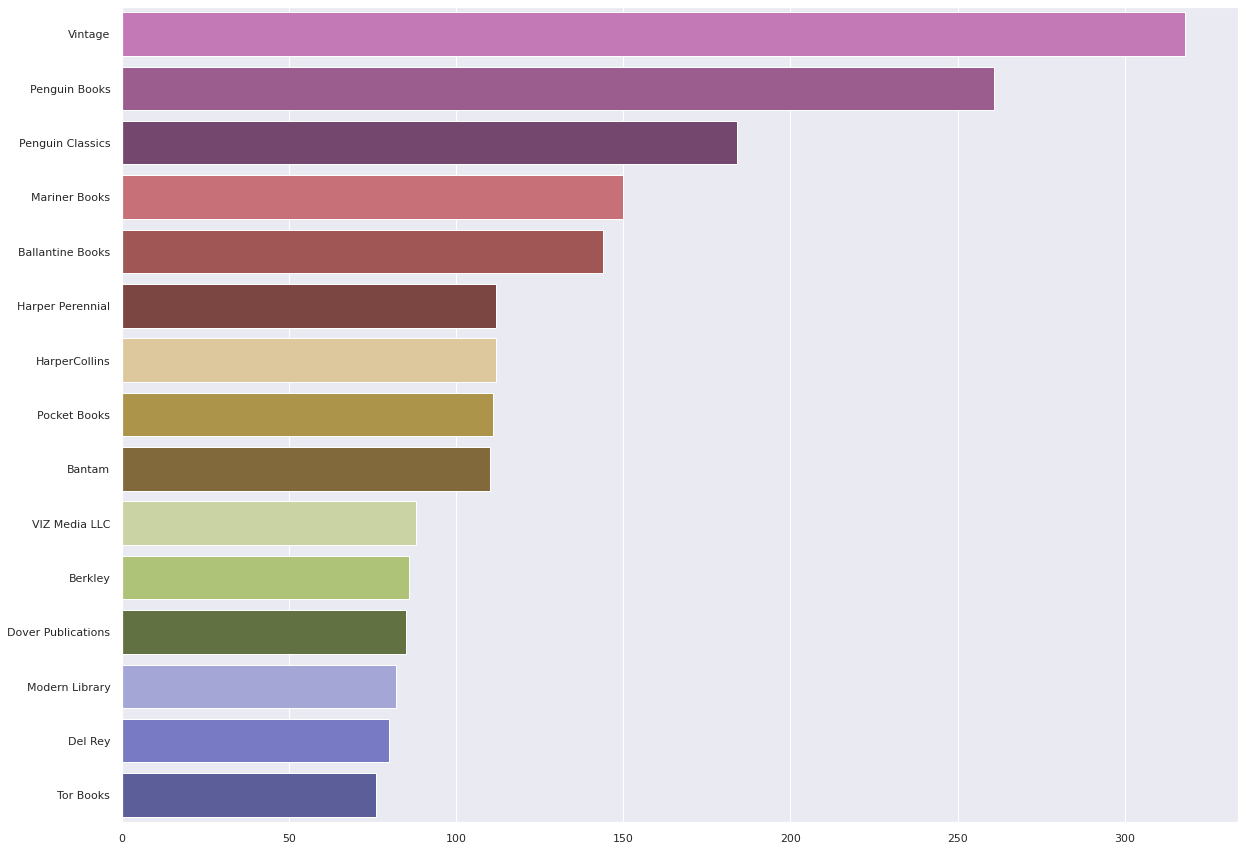

In [ ]:
sns.barplot(top_publishers.values, top_publishers.index, palette='tab20b_r')

Del grafico podemos observar que la editorial 'Vintage' es la que posee la mayor cantidad de libros del dataset, pasando los 300 titulos.

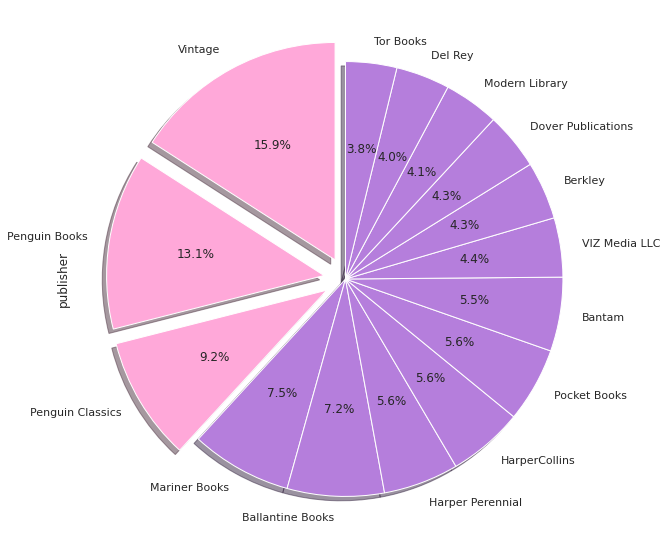

In [ ]:
# Distancia con respecto a la primer parte
explode = (.1, .1, .1, 0, 0, 
           0, 0, 0, 0, 0,
           0, 0, 0, 0, 0)
# Tamaño de la gracia
figsize=(10,10)
# Reescalado
autopct='%1.1f%%'

colors = ['#ffa8d9', '#ffa8d9', '#ffa8d9', '#b57edc', '#b57edc',
          '#b57edc', '#b57edc', '#b57edc', '#b57edc', '#b57edc',
          '#b57edc', '#b57edc', '#b57edc', '#b57edc', '#b57edc']

top_publishers.plot(kind='pie', figsize=figsize, autopct=autopct,
                  explode=explode, colors=colors, shadow=True,
                  startangle=90)

Y no sólo eso, sino que esta editorial se ha aliado de cierta forma con Penguin Books, por lo que practicamente los primeros 3 lugares de la gráfica pertenecen al mismo grupo editorial.

Lo que en su totalidad representa un $38.5\%$ de la totalidad de libros del dataset.

---

## Autor

### Visualización: Autores con libros mayor rating

### Visualización: Autores con más libros publicados

---